In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import sklearn.metrics as sm
import math
from sklearn.metrics import r2_score
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [ ]:
data = pd.read_csv("crop.csv")

In [ ]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# data['State_Name'] = labelencoder.fit_transform(data['State_Name'])
# data['District_Name'] = labelencoder.fit_transform(data['District_Name'])
# data['Crop'] = labelencoder.fit_transform(data['Crop'])
data['label'] = labelencoder.fit_transform(data['label'])
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [ ]:
data = data.astype(float)


In [ ]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,20.0
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,20.0
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,20.0
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,20.0
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,20.0


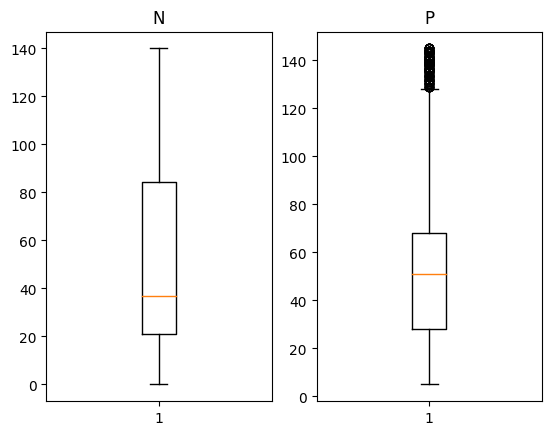

In [ ]:
# data = data[data['Production'].notna()]
from matplotlib import pyplot as plt
import numpy as np

plt.subplot(1, 2, 1) 
plt.title("N")
plt.boxplot(data['N'])
 
plt.subplot(1, 2, 2) 
plt.title("P")
plt.boxplot(data['P'])
 
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f968eda1340>,
 'caps': [<matplotlib.lines.Line2D at 0x7f968eda1880>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f968eda10a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f968eda1dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f968edaf0a0>],
 'means': []}

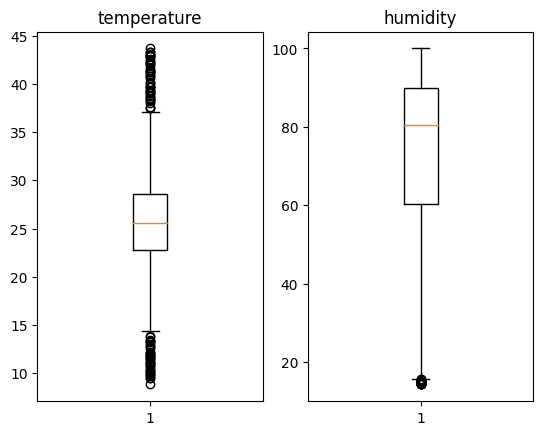

In [ ]:
plt.subplot(1, 2, 1) 
plt.title("temperature")
plt.boxplot(data['temperature'])

plt.subplot(1, 2, 2) 
plt.title("humidity")
plt.boxplot(data['humidity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f968eee1490>,
 'caps': [<matplotlib.lines.Line2D at 0x7f968eecf190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f968eee12b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f968eecf310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f968eecff40>],
 'means': []}

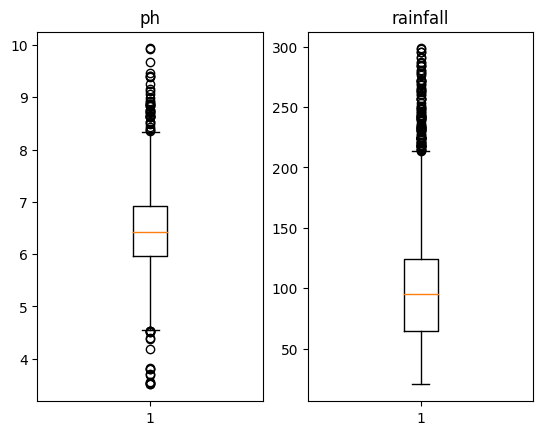

In [ ]:
plt.subplot(1, 2, 1) 
plt.title("ph")
plt.boxplot(data['ph'])

plt.subplot(1, 2, 2) 
plt.title("rainfall")
plt.boxplot(data['rainfall'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9694e3c220>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9694e430a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9694e3c1c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9694e39970>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9694e394f0>],
 'means': []}

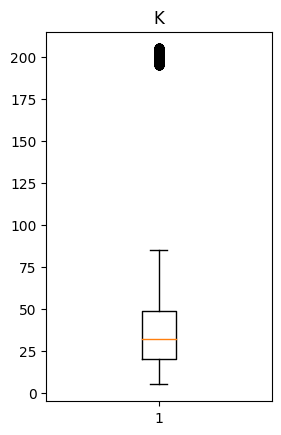

In [ ]:
plt.subplot(1, 2, 1) 
plt.title("K")
plt.boxplot(data['K'])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats.mstats import winsorize

data['P']= winsorize(data['P'],(0.05,0.05))
data['temperature']= winsorize(data['temperature'],(0.05,0.05))
data['humidity']= winsorize(data['humidity'],(0.05,0.05))
data['rainfall']= winsorize(data['rainfall'],(0.05,0.05))
data['K']= winsorize(data['K'],(0.05,0.05))
data['ph']= winsorize(data['ph'],(0.05,0.05))


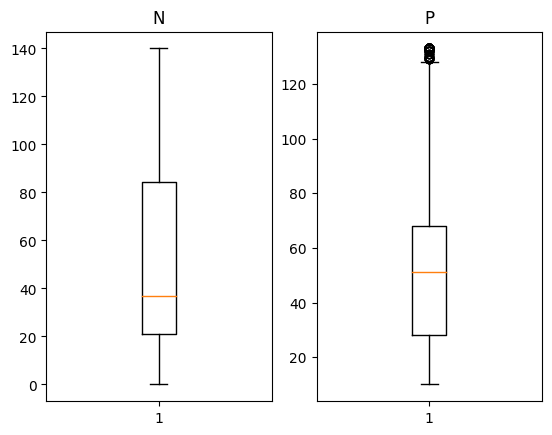

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

plt.subplot(1, 2, 1) 
plt.title("N")
plt.boxplot(data['N'])
 
plt.subplot(1, 2, 2) 
plt.title("P")
plt.boxplot(data['P'])
 

plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f96975f15b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f96975f1100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f96975f1f10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f96975f1370>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f96975a1790>],
 'means': []}

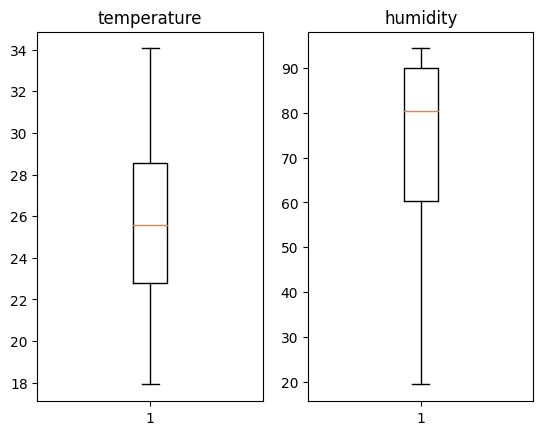

In [ ]:
plt.subplot(1, 2, 1) 
plt.title("temperature")
plt.boxplot(data['temperature'])

plt.subplot(1, 2, 2) 
plt.title("humidity")
plt.boxplot(data['humidity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f968e5d31c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9694b8ea00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9694bd9b20>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9694b8ebb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9694b8e880>],
 'means': []}

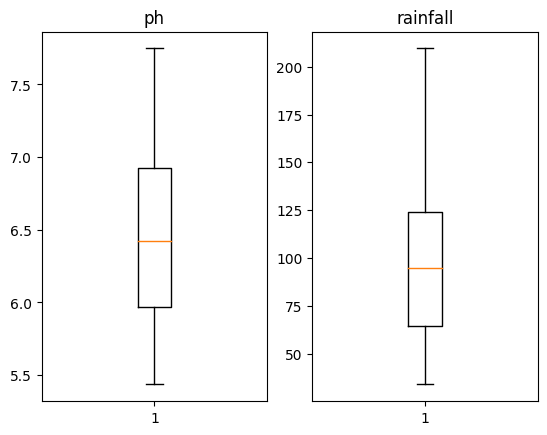

In [ ]:
plt.subplot(1, 2, 1) 
plt.title("ph")
plt.boxplot(data['ph'])

plt.subplot(1, 2, 2) 
plt.title("rainfall")
plt.boxplot(data['rainfall'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f96974e0bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f96974e04c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f96974e0700>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9697597670>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f96975970a0>],
 'means': []}

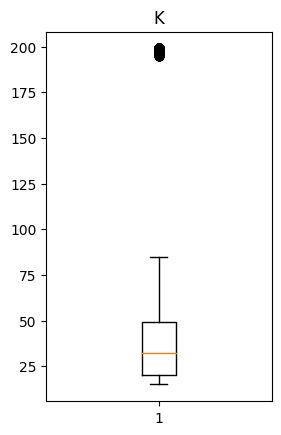

In [ ]:
plt.subplot(1, 2, 1) 
plt.title("K")
plt.boxplot(data['K'])

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3)
print("train length ->",len(train),"  test length->",len(test))

train length -> 1540   test length-> 660


In [ ]:
train = pd.DataFrame(train)
train = train.sort_values(by=['label'])
test = pd.DataFrame(test)
test = test.sort_values(by=['label'])
print(train,test)
data = data.sort_values(by=['label'])

          N      P      K  temperature   humidity        ph    rainfall  label
1569    3.0  133.0  197.0    21.981419  91.127193  6.142803  115.478915    0.0
1500   24.0  128.0  196.0    22.750888  90.694892  5.521467  110.431786    0.0
1505   32.0  133.0  199.0    22.860066  93.128599  5.824152  117.729673    0.0
1547   25.0  133.0  199.0    23.804363  92.804416  6.024249  100.619254    0.0
1552   28.0  123.0  198.0    23.462603  91.456650  5.682751  111.776340    0.0
...     ...    ...    ...          ...        ...       ...         ...    ...
1364  115.0   11.0   46.0    24.415927  89.396555  6.623167   40.321619   21.0
1301  119.0   19.0   55.0    25.187800  83.446217  6.818261   46.874209   21.0
1375   88.0   10.0   47.0    25.864755  86.674680  6.662245   41.165548   21.0
1382  101.0   11.0   51.0    25.507370  84.243402  6.792036   44.206900   21.0
1397   96.0   18.0   50.0    25.331045  84.305338  6.904242   41.532187   21.0

[1540 rows x 8 columns]           N      P      K  

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)
train = scaler.fit_transform(train)
test = scaler.fit_transform(test)

In [ ]:
# trainX = []
# trainY = []

# n_future = 1   # Number of days we want to look into the future based on the past days.
# n_past = 10  # Number of past days we want to use to predict the future.

# #Reformat input data into a shape: (n_samples x timesteps x n_features)
# #In my example, my df_for_training_scaled has a shape (12823, 5)
# #12823 refers to the number of data points and 5 refers to the columns (multi-variables).
# for i in range(n_past, len(data_scaled) - n_future +1):
#     trainX.append(data_scaled[i - n_past:i, 0:data_scaled.shape[1]-1])
#     trainY.append(data_scaled[i + n_future - 1:i + n_future, 7])

# trainX, trainY = np.array(trainX), np.array(trainY)

# print('trainX shape == {}.'.format(trainX.shape))
# print('trainY shape == {}.'.format(trainY.shape))

In [ ]:
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 10  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(train) - n_future +1):
    trainX.append(train[i - n_past:i, 0:train.shape[1]-1])
    trainY.append(train[i + n_future - 1:i + n_future, 7])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (1530, 10, 7).
trainY shape == (1530, 1).


In [ ]:
testX = []
testY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 10  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_testing_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(test) - n_future +1):
    testX.append(test[i - n_past:i, 0:test.shape[1]-1])
    testY.append(test[i + n_future - 1:i + n_future, 7])

testX, testY = np.array(testX), np.array(testY)

print('testX shape == {}.'.format(testX.shape))
print('testY shape == {}.'.format(testY.shape))

testX shape == (650, 10, 7).
testY shape == (650, 1).


In [ ]:
trainX.shape[1]

10

In [ ]:
# sgd = tf.keras.optimizers.SGD(learning_rate=0.001)
# model = Sequential()
# model.add(LSTM(50,activation='relu',input_shape=(trainX.shape[1], trainX.shape[2])))
# model.add(Dropout(0.2))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer= sgd ,metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd , loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 10, 64)            18432     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30,881
Trainable params: 30,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [ ]:
history = model.fit(trainX, trainY, epochs=100, batch_size=16, validation_split=0.2, verbose=2,callbacks=[cp1])

Epoch 1/100


77/77 - 8s - loss: 0.0686 - root_mean_squared_error: 0.2618 - val_loss: 0.2838 - val_root_mean_squared_error: 0.5327 - 8s/epoch - 106ms/step
Epoch 2/100


77/77 - 5s - loss: 0.0288 - root_mean_squared_error: 0.1698 - val_loss: 0.1904 - val_root_mean_squared_error: 0.4364 - 5s/epoch - 68ms/step
Epoch 3/100


77/77 - 5s - loss: 0.0137 - root_mean_squared_error: 0.1172 - val_loss: 0.1736 - val_root_mean_squared_error: 0.4167 - 5s/epoch - 65ms/step
Epoch 4/100
77/77 - 1s - loss: 0.0105 - root_mean_squared_error: 0.1026 - val_loss: 0.1863 - val_root_mean_squared_error: 0.4316 - 882ms/epoch - 11ms/step
Epoch 5/100
77/77 - 1s - loss: 0.0080 - root_mean_squared_error: 0.0893 - val_loss: 0.1929 - val_root_mean_squared_error: 0.4392 - 871ms/epoch - 11ms/step
Epoch 6/100
77/77 - 1s - loss: 0.0080 - root_mean_squared_error: 0.0892 - val_loss: 0.1875 - val_root_mean_squared_error: 0.4330 - 953ms/epoch - 12ms/step
Epoch 7/100
77/77 - 1s - loss: 0.0072 - root_mean_squared_error: 0.0847 - val_loss: 0.2101 - val_root_mean_squared_error: 0.4584 - 875ms/epoch - 11ms/step
Epoch 8/100


77/77 - 5s - loss: 0.0063 - root_mean_squared_error: 0.0794 - val_loss: 0.1698 - val_root_mean_squared_error: 0.4120 - 5s/epoch - 68ms/step
Epoch 9/100
77/77 - 1s - loss: 0.0063 - root_mean_squared_error: 0.0797 - val_loss: 0.1981 - val_root_mean_squared_error: 0.4451 - 1s/epoch - 14ms/step
Epoch 10/100
77/77 - 1s - loss: 0.0056 - root_mean_squared_error: 0.0748 - val_loss: 0.2292 - val_root_mean_squared_error: 0.4787 - 890ms/epoch - 12ms/step
Epoch 11/100


77/77 - 5s - loss: 0.0049 - root_mean_squared_error: 0.0701 - val_loss: 0.1278 - val_root_mean_squared_error: 0.3575 - 5s/epoch - 66ms/step
Epoch 12/100
77/77 - 1s - loss: 0.0048 - root_mean_squared_error: 0.0689 - val_loss: 0.1911 - val_root_mean_squared_error: 0.4372 - 913ms/epoch - 12ms/step
Epoch 13/100
77/77 - 1s - loss: 0.0038 - root_mean_squared_error: 0.0619 - val_loss: 0.1922 - val_root_mean_squared_error: 0.4384 - 883ms/epoch - 11ms/step
Epoch 14/100
77/77 - 1s - loss: 0.0038 - root_mean_squared_error: 0.0615 - val_loss: 0.1617 - val_root_mean_squared_error: 0.4022 - 878ms/epoch - 11ms/step
Epoch 15/100
77/77 - 1s - loss: 0.0039 - root_mean_squared_error: 0.0626 - val_loss: 0.1512 - val_root_mean_squared_error: 0.3888 - 1s/epoch - 13ms/step
Epoch 16/100
77/77 - 1s - loss: 0.0036 - root_mean_squared_error: 0.0604 - val_loss: 0.1509 - val_root_mean_squared_error: 0.3884 - 1s/epoch - 19ms/step
Epoch 17/100
77/77 - 1s - loss: 0.0034 - root_mean_squared_error: 0.0586 - val_loss: 0

77/77 - 5s - loss: 0.0015 - root_mean_squared_error: 0.0394 - val_loss: 0.1264 - val_root_mean_squared_error: 0.3555 - 5s/epoch - 69ms/step
Epoch 95/100
77/77 - 1s - loss: 0.0016 - root_mean_squared_error: 0.0402 - val_loss: 0.1431 - val_root_mean_squared_error: 0.3783 - 903ms/epoch - 12ms/step
Epoch 96/100
77/77 - 1s - loss: 0.0017 - root_mean_squared_error: 0.0417 - val_loss: 0.1327 - val_root_mean_squared_error: 0.3643 - 888ms/epoch - 12ms/step
Epoch 97/100
77/77 - 1s - loss: 0.0014 - root_mean_squared_error: 0.0379 - val_loss: 0.1446 - val_root_mean_squared_error: 0.3802 - 874ms/epoch - 11ms/step
Epoch 98/100
77/77 - 1s - loss: 0.0016 - root_mean_squared_error: 0.0397 - val_loss: 0.1338 - val_root_mean_squared_error: 0.3658 - 879ms/epoch - 11ms/step
Epoch 99/100
77/77 - 1s - loss: 0.0016 - root_mean_squared_error: 0.0394 - val_loss: 0.1442 - val_root_mean_squared_error: 0.3797 - 881ms/epoch - 11ms/step
Epoch 100/100
77/77 - 1s - loss: 0.0015 - root_mean_squared_error: 0.0393 - val_

In [ ]:
# history = model.fit(trainX, trainY, epochs=200, batch_size=16, validation_split=0.2, verbose=1)

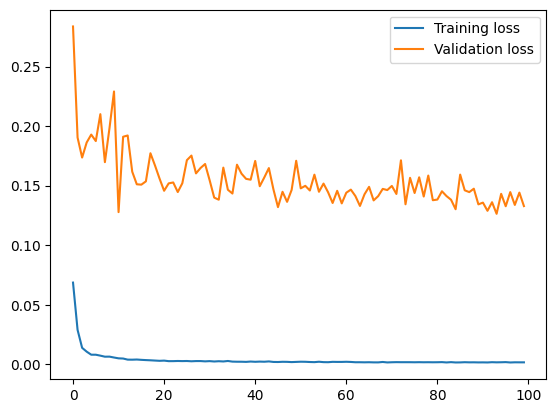

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
train_predict = model.predict(trainX)

48/48 [==============================] - 1s 4ms/step


In [ ]:
# features = np.array([[5, 2.9, 1, 0.2]])
# features = np.repeat(features, 10, axis=-1)
# model.predict(features)

In [ ]:
# fit the model
# history = model.fit(trainX, trainY, epochs=10, batch_size=64, validation_split=0.1, verbose=1)

# plt.plot(history.history['loss'], label='Training loss')
# plt.plot(history.history['val_loss'], label='Validation loss')
# plt.legend()

In [ ]:
# train_predict = model.predict(trainX )

In [ ]:
trainY = np.repeat(trainY, data_scaled.shape[1], axis=-1)
trainY_scaler = scaler.inverse_transform(trainY)[:,0]
#train original

In [ ]:
train_predict_new = np.repeat(train_predict, data_scaled.shape[1], axis=-1)
train_predict_scaler = scaler.inverse_transform(train_predict_new)[:,0]
#train prediction


In [ ]:
neg_nos = [num for num in train_predict_scaler if num < 0]
neg_nos

[]

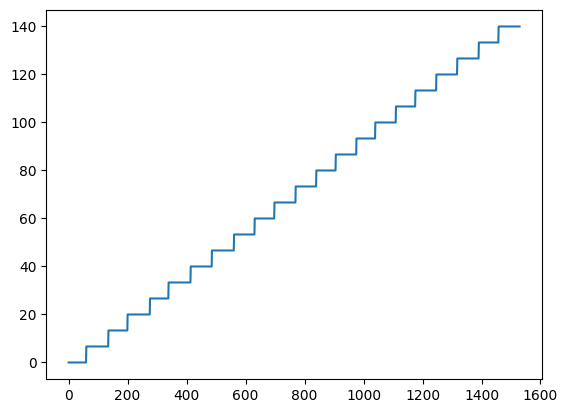

In [ ]:
plt.plot(trainY_scaler, label="actual")

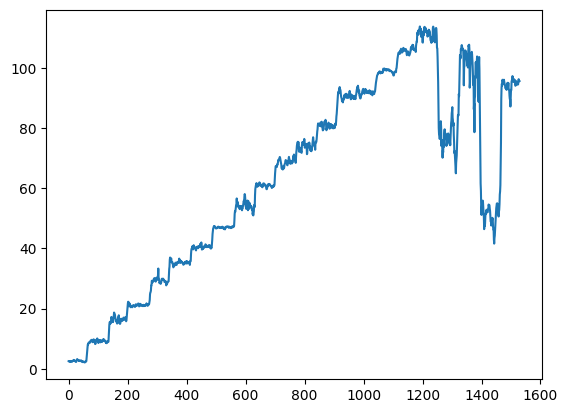

In [ ]:
plt.plot(train_predict_scaler, label="predicted")

In [ ]:
print("train data") 
print("R2 score =", r2_score(trainY_scaler,train_predict_scaler))

train data
R2 score = 0.70552799661937


In [ ]:
MSE = np.square(np.subtract(trainY_scaler,train_predict_scaler)).mean()   
   
rsme = math.sqrt(MSE)  
print("Root Mean Square Error:\n")  
print(rsme)  

Root Mean Square Error:

22.903003346946313


In [ ]:
val_results = pd.DataFrame(data={'Val Predictions':train_predict_scaler, 'Actuals':trainY_scaler})
val_results

,Val Predictions,Actuals
0,2.535046,0.0
1,2.528921,0.0
2,2.497445,0.0
3,2.306244,0.0
4,2.377082,0.0
...,...,...
1525,95.327187,140.0
1526,96.238861,140.0
1527,95.618904,140.0
1528,95.734665,140.0


In [ ]:
res = np.array(trainY_scaler) 
unique_res = np.unique(res) 
print("Unique elements of the list using numpy.unique():\n")
print(unique_res)

Unique elements of the list using numpy.unique():

[  0.           6.66666667  13.33333333  20.          26.66666667
  33.33333333  40.          46.66666667  53.33333333  60.
  66.66666667  73.33333333  80.          86.66666667  93.33333333
 100.         106.66666667 113.33333333 120.         126.66666667
 133.33333333 140.        ]


In [ ]:
new_predicetd = []
for j in train_predict_scaler:
  temp = []
  for k in unique_res:
    diff = j - k
    diff = int(abs(diff))
    temp.append(diff)
  value = min(temp)
  ind = temp.index(value)
  new_predicetd.append(unique_res[ind])

In [ ]:
print("train data") 
print("R2 score =", r2_score(trainY_scaler,new_predicetd))

train data
R2 score = 0.7003348967989882


In [ ]:
len(new_predicetd)

1530

In [ ]:
val_results = pd.DataFrame(data={'Val Predictions':new_predicetd, 'Actuals':trainY_scaler})
val_results

,Val Predictions,Actuals
0,0.000000,0.0
1,0.000000,0.0
2,0.000000,0.0
3,0.000000,0.0
4,0.000000,0.0
...,...,...
1525,93.333333,140.0
1526,93.333333,140.0
1527,93.333333,140.0
1528,93.333333,140.0


In [ ]:
test_predict = model.predict(testX)

21/21 [==============================] - 0s 4ms/step


In [ ]:
test_predict_new = np.repeat(test_predict, data_scaled.shape[1], axis=-1)
test_predict_scaler = scaler.inverse_transform(test_predict_new)[:,0]
#test prediction
testY = np.repeat(testY, data_scaled.shape[1], axis=-1)
testY_scaler = scaler.inverse_transform(testY)[:,0]

In [ ]:
print("test data") 
print("R2 score =", r2_score(testY_scaler,test_predict_scaler))

test data
R2 score = 0.6570278401725822


In [ ]:
MSE = np.square(np.subtract(testY_scaler,test_predict_scaler)).mean()   
   
rsme = math.sqrt(MSE)  
print("Root Mean Square Error:\n")  
print(rsme)

Root Mean Square Error:

24.200713613589972


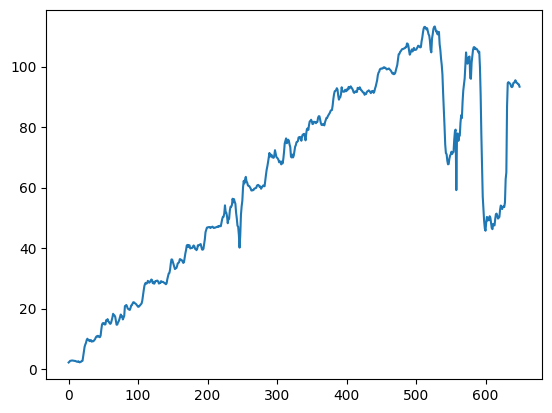

In [ ]:
plt.plot(test_predict_scaler, label="predicted")

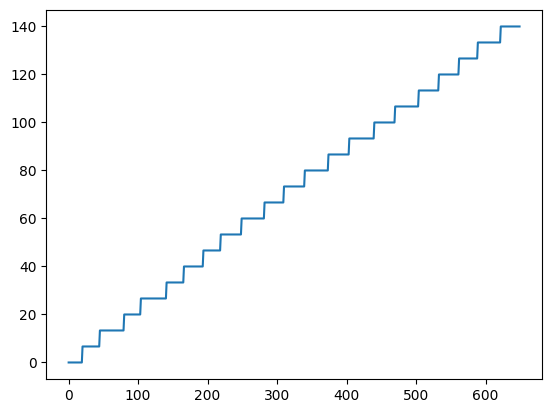

In [ ]:
plt.plot(testY_scaler, label="actual")

In [ ]:
# import pickle

# loaded_model = pickle.load(open('model.pkl', 'rb'))

# # result = loaded_model.score(X_test, Y_test)
# # print(result)

In [ ]:
data_new = pd.read_csv("crop.csv")

In [ ]:
data_new

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
label = data_new['label'].values.tolist()
actual_count = []
count_predicted =[ ]
for y in crops:
  count_predicted.append(crop_predicted.count(y))
  actual_count.append(label.count(y))


In [ ]:
len(count_predicted)

22

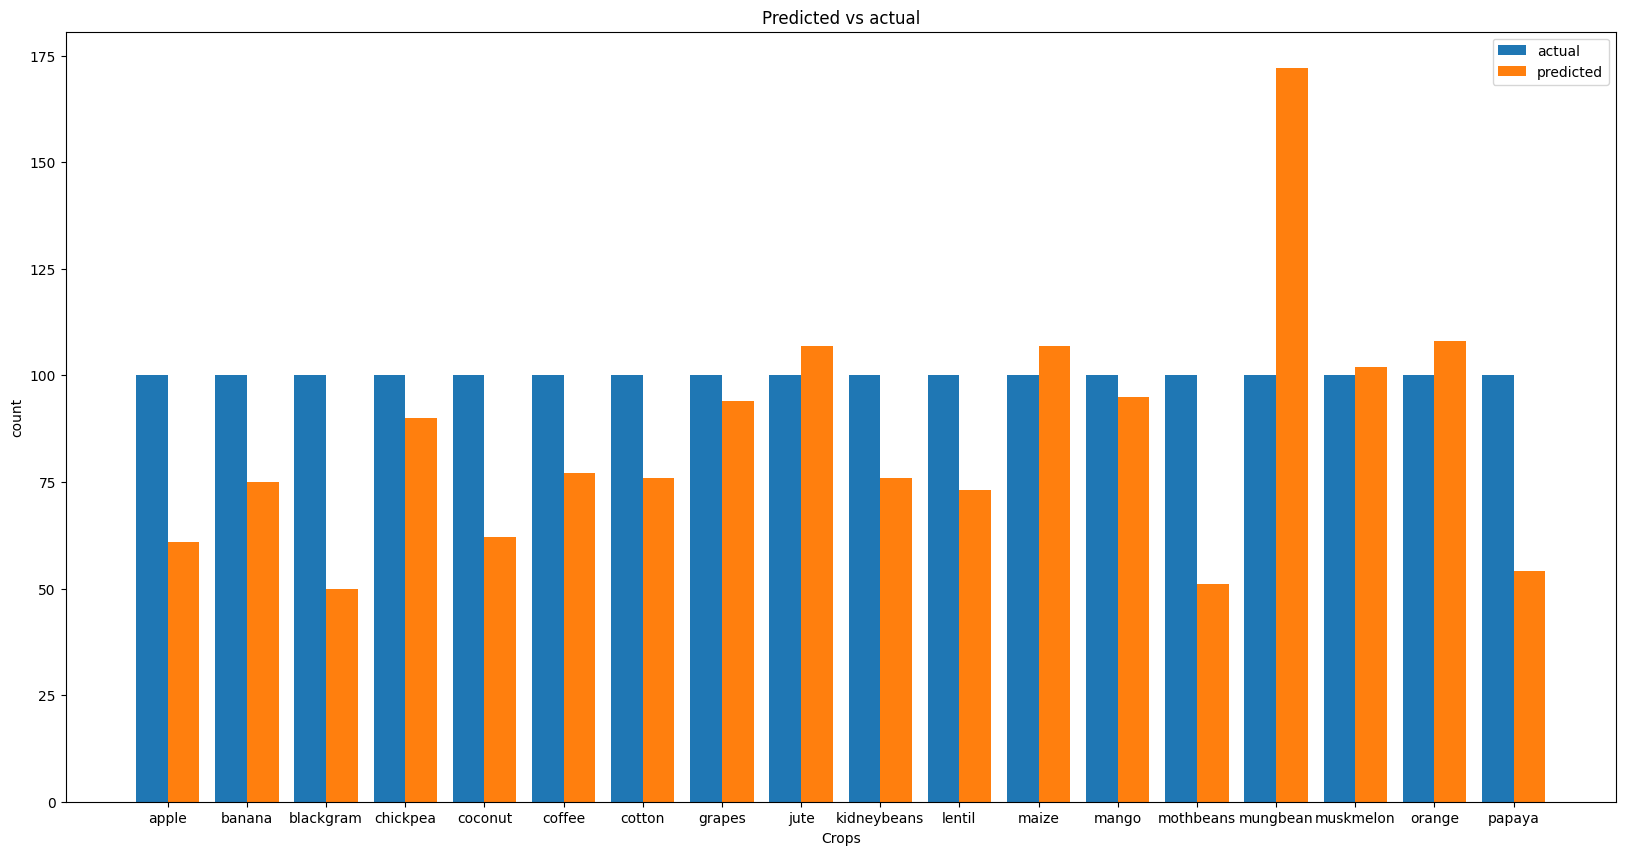

In [ ]:
X = ['Group A','Group B','Group C','Group D']
plt.figure(figsize=(20,10))
X_axis = np.arange(len(crops))
  
plt.bar(X_axis - 0.2, actual_count, 0.4, label = 'actual',)
plt.bar(X_axis + 0.2, count_predicted, 0.4, label = 'predicted',)
  
plt.xticks(X_axis, crops)
plt.xlabel("Crops")
plt.ylabel("count")
plt.title("Predicted vs actual")
plt.legend()
plt.show()